# Analysis example and plotting tutorial

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import mcmm

import pyemma
from mcmm.example import generate_test_data


plt.rc('font', size=15)

Here, we define a function to add often used properties to a matplotlib axis object.

In [2]:
def format_square(ax):
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
    ax.set_xticks([-2, -1, 0, 1, 2])
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_xlabel(r"$x$ / a.u.")
    ax.set_ylabel(r"$y$ / a.u.")
    ax.set_aspect('equal')

## Data generation

We start by calling the data generation function from the example module.

In [3]:
raw_data = generate_test_data(num_trajs=5, traj_length=20000)


`raw_data` is a list of 2D numpy ndarrays which we visualise as a scatter plot. You can also try to plot the $x$-/$y$-components as time series.

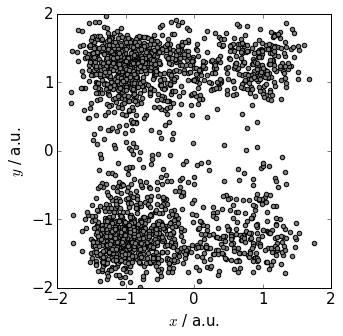

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
for rd in raw_data:
    ax.scatter(rd[::50, 0], rd[::50, 1], c='grey', s=20)
format_square(ax)
fig.tight_layout()

## Clustering and discretisation

This example uses `pyemma`, but your `mcmm` nodule must be able to to the same.

In [5]:
cluster = mcmm.clustering.cluster(raw_data,ctrs = 100)
centers = cluster.centers
dtrajs = cluster.disctrajectories


initialisation done
entered while loop one time.
entered while loop   2  times.
entered while loop   3  times.
entered while loop   4  times.
entered while loop   5  times.
entered while loop   6  times.
entered while loop   7  times.
entered while loop   8  times.
entered while loop   9  times.
entered while loop  10  times.
entered while loop  11  times.
entered while loop  12  times.
entered while loop  13  times.
entered while loop  14  times.
entered while loop  15  times.
entered while loop  16  times.
entered while loop  17  times.
entered while loop  18  times.


In [ ]:
cluster2 = pyemma.coordinates.cluster_kmeans(data=raw_data, k=100, max_iter=100)
centers2 = cluster2.clustercenters
dtrajs2 = cluster2.dtrajs

We extend our scatter plot of the raw data by adding the cluster centers.

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
for rd in raw_data:
    ax.scatter(rd[::50, 0], rd[::50, 1], c='grey', s=20)
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
format_square(ax)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
for rd in raw_data:
    ax.scatter(rd[::50, 0], rd[::50, 1], c='grey', s=20)
ax.scatter(centers2[:, 0], centers2[:, 1], c='red', s=50)
format_square(ax)
fig.tight_layout()

## Estimation and timescales

This is where we start to estimate transition matrices. In order to find a good lagtime, we can estimate several transition matrices for different lagtimes and look at the timescales. Once they are converged, we might have found a suitable lagtime.

In [ ]:
ax = mcmm.msm.impliedTimescales(dtrajs,[1,2,5,10,20,50,100,200,500,1000],cluster.numberCenters)
#print(dtrajs)
#ax.figure.tight_layout()

"""
ax = pyemma.plots.plot_implied_timescales(
    pyemma.msm.its(dtrajs=dtrajs, lags=[1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]),
    xlog=True, marker='o')
ax.figure.tight_layout()"""

In [ ]:
ax = pyemma.plots.plot_implied_timescales(
    pyemma.msm.its(dtrajs=dtrajs2, lags=[1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]),
    xlog=True, marker='o')
ax.figure.tight_layout()

## Analysis

Let's learn something about our system. We start by looking at the stationary distribution $\pi$, which can be visualised as a colored scatter plot of the cluster centers.

In [ ]:
tau = 50
estimationObject = mcmm.estimation.estimate(cluster.disctrajectories,tau,cluster.numberCenters)

msmObject = mcmm.msm.MSM(estimationObject.transitionMatrix)


fig, ax = plt.subplots(figsize=(6.5, 5))
im = ax.scatter(centers[:, 0], centers[:, 1], c=msmObject.stationary, s=200, cmap=mpl.cm.viridis)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"$\pi(x,y)$", fontsize=20)
format_square(ax)
fig.tight_layout()

In [ ]:
msm = pyemma.msm.estimate_markov_model(dtrajs=dtrajs2, lag=50)

fig, ax = plt.subplots(figsize=(6.5, 5))
im = ax.scatter(centers2[:, 0], centers2[:, 1], c=msm.stationary_distribution, s=200, cmap=mpl.cm.viridis)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"$\pi(x,y)$", fontsize=20)
format_square(ax)
fig.tight_layout()

In the same way, we can visualise, e.g., some of the right eigenvectors.

In [ ]:

rev = np.real(msmObject.righteigvectors) #do we need the np.real?
#in original plotting notebook, righteigvectors gets as a input k=5


fig, axes = plt.subplots(1, 4, figsize=(12, 3.5))
for i, ax in enumerate(axes.flat):
    ax.scatter(centers[:, 0], centers[:, 1], s=80, c=rev[:, i+1], cmap=mpl.cm.viridis)
    format_square(ax)
fig.tight_layout()

In [ ]:
rev = msm.eigenvectors_right()

fig, axes = plt.subplots(1, 4, figsize=(12, 3.5))
for i, ax in enumerate(axes.flat):
    ax.scatter(centers2[:, 0], centers2[:, 1], s=80, c=rev[:, i+1], cmap=mpl.cm.viridis)
    format_square(ax)
fig.tight_layout()

In [ ]:
rev = msm.eigenvectors_right(k=5)

fig, axes = plt.subplots(1, 4, figsize=(12, 3.5))
for i, ax in enumerate(axes.flat):
    ax.scatter(centers2[:, 0], centers2[:, 1], s=80, c=rev[:, i+1], cmap=mpl.cm.viridis)
    format_square(ax)
fig.tight_layout()

Now it's useful to start coarse graining our system into metastable states with PCCA++. The assignments can, again, be visualised as a colored scatter plot.

In [ ]:
n_pcca_states = 4


assign,c = msmObject.pcca(n_pcca_states)

fig, ax = plt.subplots(figsize=(6.5, 5))
im = ax.scatter(centers[:, 0], centers[:, 1], c=c, s=200, cmap=mpl.cm.viridis)
cbar = fig.colorbar(im, ax=ax)
cbar.set_ticks(np.arange(n_pcca_states))
cbar.set_label(r"metastable state", fontsize=20)
format_square(ax)
fig.tight_layout()

In [ ]:
n_pcca_states = 4

msm.pcca(n_pcca_states)

fig, ax = plt.subplots(figsize=(6.5, 5))
im = ax.scatter(centers2[:, 0], centers2[:, 1], c=msm.metastable_assignments, s=200, cmap=mpl.cm.viridis)
cbar = fig.colorbar(im, ax=ax)
cbar.set_ticks(np.arange(n_pcca_states))
cbar.set_label(r"metastable state", fontsize=20)
format_square(ax)
fig.tight_layout()

We compute the stationary probabilities of the metastable states and use this as new coloring for the scatter plot.

In [ ]:
pi = np.array([msmObject.stationary[s].sum() for s in assign])
pi_vec = pi[c]

fig, ax = plt.subplots(figsize=(6.5, 5))
im = ax.scatter(centers[:, 0], centers[:, 1], c=pi_vec, s=200, cmap=mpl.cm.viridis)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"$\pi($metastable state$)$", fontsize=20)
format_square(ax)
fig.tight_layout()

In [ ]:
pi = np.array([msm.stationary_distribution[s].sum() for s in msm.metastable_sets])
pi_vec = pi[msm.metastable_assignments]

fig, ax = plt.subplots(figsize=(6.5, 5))
im = ax.scatter(centers2[:, 0], centers2[:, 1], c=pi_vec, s=200, cmap=mpl.cm.viridis)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"$\pi($metastable state$)$", fontsize=20)
format_square(ax)
fig.tight_layout()



Finally, we compute mean first passage times (MFPTs) and draw a graph where the size of the nodes is proportional to the stationary probabilities of the metastable states and the thickness of the arrows indicates how fast a transition can occur on average. The actual MFPT values are used as labels for the arrows.

In [ ]:
metaT=msmObject.metaT(assign)

mfptours = np.zeros(shape=(n_pcca_states, n_pcca_states))
for i, s1 in enumerate(assign):
    for j, s2 in enumerate(assign):
        if s1 is s2: continue
        mfptours[i, j] = mcmm.msm.mfptTsets(msmObject.transition_matrix, s1, s2,tau)
mfptours

In [ ]:
mfpt2 = np.zeros(shape=(n_pcca_states, n_pcca_states))
for i, s1 in enumerate(msm.metastable_sets):
    for j, s2 in enumerate(msm.metastable_sets):
        if s1 is s2: continue
        mfpt2[i, j] = msm.mfpt(s1, s2)
mfpt2

In [ ]:
mfpt=mfptours

arrow_weights = mfpt.copy()
nz = mfpt.nonzero()
arrow_weights[nz] = 1.0 / arrow_weights[nz]

fig, pos = pyemma.plots.plot_network(
    arrow_weights, xpos=[1, 1.5, 4, 4.5], state_sizes=pi,
    arrow_labels=mfpt, arrow_label_format="%.0f", arrow_scale=2.0)
fig.tight_layout()

In [ ]:
mfpt=mfpt2

arrow_weights = mfpt.copy()
nz = mfpt.nonzero()
arrow_weights[nz] = 1.0 / arrow_weights[nz]

fig, pos = pyemma.plots.plot_network(
    arrow_weights, xpos=[1, 1.5, 4, 4.5], state_sizes=pi,
    arrow_labels=mfpt, arrow_label_format="%.0f", arrow_scale=2.0)
fig.tight_layout()